Problem 5.1

In [6]:
# Importing libraries
import numpy as np
import thinkstats2
import thinkplot
import scipy.stats
import brfss


In [7]:
# Finding the probability of the U.S. male using .cdf module
# 5'10" = 177.8 cm
# 6'1" = 185.4 cm
upper_cdf = scipy.stats.norm.cdf(177.8, loc = 178, scale = 7.7) 
lower_cdf = scipy.stats.norm.cdf(185.4, loc = 178, scale = 7.7)

print("The percentage of U.S. male between the range 177.8 - 185.4 is", lower_cdf-upper_cdf)

The percentage of U.S. male between the range 177.8 - 185.4 is 0.3420946829459531


Problem 5.2

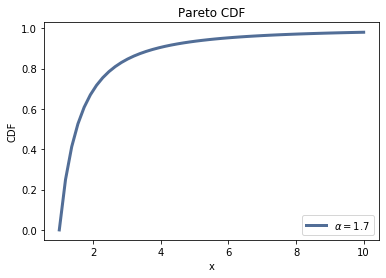

In [8]:
# Plotting Pareto Distribution with given parameters
xmin = 1
alpha = 1.7

xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10)
thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)
thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

In [9]:
import math

# Finding mean human height with pareto distribution
pareto_dist = scipy.stats.pareto(b=alpha, scale=xmin)
mean = pareto_dist.mean()
print("Mean human height in meters: ", mean)

# calculating population that is shorter than the mean
short_than_mean = pareto_dist.cdf(mean)
print("Fraction of the population that is shorter than the mean: ", short_than_mean)

taller_than_1km = 1 - pareto_dist.cdf(1000)

# Note: we have rounded the result to the next time since number of people in decimal seems irrational
print("Number of people taller than 1 km: ", math.ceil(taller_than_1km*7e09))

# To calculate the tallest person, the output should be closer to 1.
# Assume human population to be 7 billion 

tallest_person = (1 - pareto_dist.cdf(6.2e05))*7e09
print("Based on our calculation above, the tallest person should be approximately 620 km.")

Mean human height in meters:  2.428571428571429
Fraction of the population that is shorter than the mean:  0.778739697565288
Number of people taller than 1 km:  55603
Based on our calculation above, the tallest person should be approximately 620 km.


Problem 6.1 

In [10]:
import hinc

# Importing dataframe 
df = hinc.ReadData()
df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [11]:
def InterpolateSample(df, log_upper):
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [12]:
# function to generate income value for all respondant using linespace function
log_sample = InterpolateSample(df, log_upper=6.0)
respondant = np.power(10, log_sample)
cdf = thinkstats2.Cdf(respondant)

In [13]:
# Calculating mean and median
median = cdf.Value(0.5)
mean = respondant.mean()
print(f"Mean: {mean}\nMedian: {median}")

Mean: 74278.7075311872
Median: 51226.45447894046


In [14]:
# Using author's functions to calculate skewness and Pearson's value

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k


def PearsonMedianSkewness(xs, median):
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

skewness = StandardizedMoment(respondant, k=3)
pearson = PearsonMedianSkewness(respondant, median)
print(f"skewness: {skewness}\nPearson's skewness: {pearson}")

skewness: 4.949920244429583
Pearson's skewness: 0.7361258019141782


In [15]:
income_below_mean = cdf.Prob(mean)
print(f"Fraction of population below the mean: ",income_below_mean)

Fraction of population below the mean:  0.660005879566872


In [17]:
# How do the results depend on the assumed upper bound?
upper_sample = InterpolateSample(df, 12)
upper_respondant = np.power(10, upper_sample)
upper_cdf = thinkstats2.Cdf(upper_respondant)
upper_median = cdf.Value(0.5)
upper_mean = upper_respondant.mean()
print(f"Mean: {upper_mean}\nMedian: {upper_median}")

upper_skewness = StandardizedMoment(upper_respondant, k=3)
upper_pearson = PearsonMedianSkewness(upper_respondant, upper_median)
print(f"skewness: {upper_skewness}\nPearson's skewness: {upper_pearson}")

Mean: 1567333257.5653448
Median: 51226.45447894046
skewness: 23.79016708094421
Pearson's skewness: 0.16800598065724953


# How do the results depend on the assumed upper bound?
Based on the calculation above, we can observe that the Pearson's skewness value decreases closer to zero as the upper bound is doubled, which indicates that the distribution has no skewness. If the distribution is postiviely skewness, changing the upper bound to a higher value will certainly change the mean and shift the shape of the right, to become less skewed. 